In [1]:
import sarracen as src
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

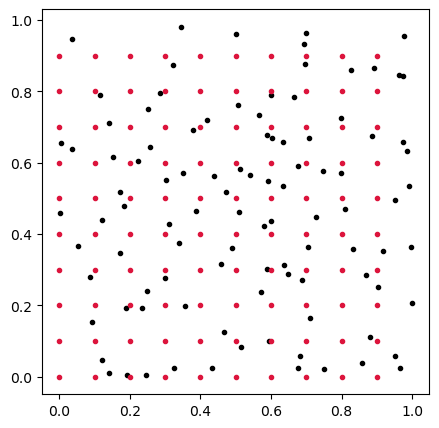

In [2]:
sdf_ini = pd.read_csv('../Data/initial_distribution/ideal_gas.csv')
sdf_n = pd.read_csv('../Data/results/ideal_gas.csv')

fig = plt.figure(figsize=(5,5))
plt.plot(sdf_n['x'], sdf_n['y'], '.', color='k')
plt.plot(sdf_ini['x'], sdf_ini['y'], '.', color='crimson')
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

In [3]:
sdf = src.read_csv('../Data/results/ideal_gas.csv')
sdf

,m,x,y,vx,vy,u,h,rho
0,0.1,0.244577,0.003614,-0.607405,-0.324420,-0.659506,0.130017,8.518422
1,0.1,0.964595,0.024180,0.390907,0.290996,-0.669393,0.157792,5.783498
2,0.1,0.978024,0.955655,0.214287,0.367732,-0.610142,0.183534,4.274923
3,0.1,0.540677,0.566616,-0.138563,1.577378,0.128675,0.084387,20.221098
4,0.1,0.284809,0.794154,0.107425,-0.589958,-0.438529,0.131356,8.345732
...,...,...,...,...,...,...,...,...
95,0.1,0.465957,0.125252,-0.021108,-0.682964,-0.106204,0.137991,7.562402
96,0.1,0.433221,0.023744,-0.325810,-0.511410,-0.129203,0.157933,5.773152
97,0.1,0.233228,0.191996,-0.123047,0.271332,-0.079414,0.110744,11.741466
98,0.1,0.457449,0.314912,-0.396594,-0.293349,-0.031006,0.125091,9.202609


<Axes: xlabel='x', ylabel='y'>

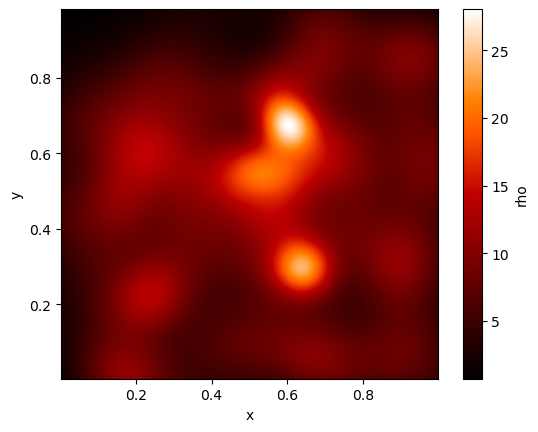

In [4]:
sdf.render('rho', xsec=0.0)